<a href="https://colab.research.google.com/github/jeniferGoncalvesDaSilvaDev/python-finance/blob/main/Pr%C3%A1tica_C%C3%93DIGO_Case_Jornada_Quant_Dia_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src = "https://github.com/Trading-com-Dados/pmf/blob/main/logotipo-trading-com-dados.svg?raw=true" width = "100">




<center><img src = "https://github.com/victorncg/financas_quantitativas/blob/main/LOGO%20JQ%20003.png?raw=true" width = "300">



---




# **Jornada Quant**

Sejam bem-vindos a primeira aula da Jornada Quant!

Nesta aula, vamos ver como consultar a base de dados fundamentalistas da biblioteca Fundamentus.

Depois, faremos algumas manipulações com os dados.

Por fim, vamos realizar um **screening**, ou seja, um filtro de ações de acordo com alguns critérios pré-estabelecidos.

# **0. Instalando e importando bibliotecas**

Instalando biblioteca **fundamentus** e algumas dependências

In [ ]:
!pip install fundamentus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.9 MB/s eta 0:00:00


In [ ]:
import fundamentus
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# **1. Obtendo e explorando os dados**

In [ ]:
df = fundamentus.get_resultado()

# Para visualizar as 5 primeiras linhas
df

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
AALR3,8.92,-4.01,1.04,0.914,0.0000,0.384,-4.72,49.46,-0.97,84.92,13.10,0.0185,-0.2210,0.0091,-0.2592,0.74,1462070.0,1.015110e+09,1.04,0.0354
ABCB3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.1429,0.00,0.0,5.721810e+09,0.00,0.7094
ABCB4,23.50,6.81,0.97,0.000,0.0640,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.1429,0.00,14812300.0,5.721810e+09,0.00,0.7094
ABEV3,13.62,14.23,2.38,2.603,0.0536,1.556,57.88,12.62,-24.38,11.80,8.68,0.2063,0.1882,0.1650,0.1671,1.11,322647000.0,9.025490e+10,0.04,0.1323
ABYA3,4.91,-214.80,1.76,2.055,0.0000,0.527,1.98,19.96,-2.75,33.67,33.67,0.1029,-0.0096,0.0278,-0.0082,2.09,0.0,2.920600e+08,1.31,0.1641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WLMM4,27.95,9.63,1.52,0.481,0.0321,1.233,2.82,7.97,3.30,7.26,7.01,0.0603,0.0499,0.1834,0.1577,4.54,14298.1,6.698980e+08,0.01,0.2265
WMBY3,25.39,-19.30,2.87,0.836,0.0000,0.182,1.20,8.62,-1.50,25.02,25.02,0.0970,-0.0705,0.0239,-0.1486,1.44,0.0,2.124390e+08,6.51,-0.1448
WSON33,67.00,8.07,0.98,1.067,0.0000,0.400,13.41,2.42,-0.89,5.08,5.08,0.4414,0.1358,0.1836,0.1217,1.26,0.0,2.148530e+09,1.21,0.0523


In [ ]:
df.shape

(967, 20)

In [ ]:
df.loc[['GRND3', 'ABEV3'],['pl', 'roe']]

Multiples,pl,roe
papel,,
GRND3,12.38,0.1485
ABEV3,14.23,0.1671


In [ ]:
df[(df.pl > 0) & (df.dy > 0.1)].sort_values('dy', ascending = False)

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
EPAR3,10.00,4.69,1.20,0.309,262.5560,1.047,2.30,12.51,2.96,10.97,9.60,0.0247,0.0658,0.0971,0.2558,18.54,3.964620e+05,1.238600e+08,0.01,0.0824
BSLI4,12.22,15.48,1.80,0.000,12.6055,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.1162,0.00,9.911510e+03,2.467570e+09,0.00,0.0189
BSLI3,13.14,16.64,1.93,0.000,10.6572,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.1162,0.00,4.992080e+03,2.467570e+09,0.00,0.0189
TRPN3,0.71,0.44,0.54,0.263,1.0474,0.399,0.59,0.36,0.59,-0.35,-0.35,0.7228,0.5929,5.2301,1.2235,3.61,0.000000e+00,5.935800e+07,0.00,0.0577
LEVE3,36.24,6.85,3.13,1.107,0.2581,1.560,5.06,6.02,10.70,6.00,5.34,0.1837,0.1613,0.3602,0.4573,1.91,2.229400e+07,1.568530e+09,0.31,0.1850
AURE3,13.47,6.64,0.96,2.259,0.2227,0.431,3.62,15.65,-1.42,17.17,10.18,0.1444,0.3401,0.0339,0.1452,1.92,7.865330e+07,1.396240e+10,0.44,0.2156
GRND3,7.10,12.38,1.84,2.629,0.1954,1.657,3.00,17.32,3.05,15.43,12.30,0.1518,0.2123,0.1227,0.1485,7.09,8.086950e+06,3.483510e+09,0.03,0.0659
PETR4,38.10,3.63,1.29,0.927,0.1902,0.485,-68.46,2.06,-1.01,3.05,2.33,0.4492,0.2564,0.2576,0.3547,0.95,1.553920e+09,3.860070e+11,0.79,0.2027
PETR3,39.42,3.76,1.33,0.959,0.1838,0.501,-70.83,2.13,-1.05,3.12,2.38,0.4492,0.2564,0.2576,0.3547,0.95,3.887110e+08,3.860070e+11,0.79,0.2027


# **2. Manipulações nos dados**

Remoção de duplicatas

In [ ]:
df['EMPRESA'] = df.index.str[:4]

In [ ]:
df.head()

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,...,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y,EMPRESA
papel,,,,,,,,,,,,,,,,,,,,,
AALR3,8.92,-4.01,1.04,0.914,0.0000,0.384,-4.72,49.46,-0.97,84.92,...,0.0185,-0.2210,0.0091,-0.2592,0.74,1462070.0,1.015110e+09,1.04,0.0354,AALR
ABCB3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.1429,0.00,0.0,5.721810e+09,0.00,0.7094,ABCB
ABCB4,23.50,6.81,0.97,0.000,0.0640,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.1429,0.00,14812300.0,5.721810e+09,0.00,0.7094,ABCB
ABEV3,13.62,14.23,2.38,2.603,0.0536,1.556,57.88,12.62,-24.38,11.80,...,0.2063,0.1882,0.1650,0.1671,1.11,322647000.0,9.025490e+10,0.04,0.1323,ABEV
ABYA3,4.91,-214.80,1.76,2.055,0.0000,0.527,1.98,19.96,-2.75,33.67,...,0.1029,-0.0096,0.0278,-0.0082,2.09,0.0,2.920600e+08,1.31,0.1641,ABYA


In [ ]:
df = df.drop_duplicates(subset = ['EMPRESA'])

# **3. Fazendo nosso screening**

Vamos filtrar empresas com patrimônio líquido positivo e depois vamos fazer um outro filtro com base na dívida bruta sobre o patrimônio líquido

In [ ]:
filtrado = df[(df.patrliq > 0) & (df.divbpatr < 0.5)]

In [ ]:
divida_bruta_patr = filtrado.sort_values('divbpatr', ascending = True)

In [ ]:
divida_bruta_patr = divida_bruta_patr.head(50)

In [ ]:
divida_bruta_patr

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,...,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y,EMPRESA
papel,,,,,,,,,,,,,,,,,,,,,
ABCB3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.1429,0.00,0.00,5.721810e+09,0.0,0.7094,ABCB
CORR3,12.00,0.04,0.06,0.834,0.0000,0.017,0.03,-0.08,0.42,3.33,...,-10.5766,21.4114,-0.8544,1.5284,4.25,0.00,4.665000e+06,0.0,-0.4209,CORR
MPLU3,26.80,12.20,17.37,6.877,0.0000,2.676,50.65,10.34,66.01,7.71,...,0.6652,0.5637,1.2957,1.4240,1.06,0.00,2.502790e+08,0.0,-0.1888,MPLU
NINJ3,4.94,83.98,0.88,4.129,0.0000,0.825,0.94,-9.27,0.94,0.95,...,-0.4453,0.0492,-1.3111,0.0105,16.07,719895.00,2.851950e+08,0.0,0.0333,NINJ
ODER3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.0000,0.00,0.00,4.981200e+08,0.0,0.2475,ODER
CLAN3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,-0.0105,0.00,0.00,1.012240e+09,0.0,-0.6396,CLAN
CGRA3,26.05,6.10,0.60,0.780,0.1017,0.433,1.61,6.46,2.79,4.73,...,0.1209,0.1281,0.0832,0.0980,2.66,116652.00,8.757810e+08,0.0,0.1206,CGRA
ODPV3,11.85,13.31,4.46,3.108,0.0316,3.149,-162.32,9.78,-42.01,9.26,...,0.3179,0.2335,0.3931,0.3350,0.92,14221600.00,1.467850e+09,0.0,0.0392,ODPV
PINE3,4.50,6.73,0.98,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.1449,0.00,285.28,9.645100e+08,0.0,1.2768,PINE


**Função especial**

Verificação de empresas que ainda são negociadas

In [ ]:
from datetime import datetime, timedelta

def is_traded_recently(acao):
    try:
        # Trazer os dados históricos de cotação para aquela ação
        stock = yf.Ticker(acao)
        historical_data = stock.history(period='1mo')

        # Trazer a cotação mais recente e obter a data correspondente
        last_trading_day = historical_data.index[-1].date()

        # Verificar se o dia de negociação mais recente está dentro de uma janela de dias
        today = datetime.now().date()
        window_start = today - timedelta(days=5)

        return window_start <= last_trading_day <= today
    except Exception:

        return False

In [ ]:
is_traded_recently('PETR4.SA')

True

In [ ]:
is_traded_recently('VIIA3.SA')

ERROR:yfinance:VIIA3.SA: No data found, symbol may be delisted


False

In [ ]:
is_traded_recently('LAME3.SA')

ERROR:yfinance:LAME3.SA: No data found, symbol may be delisted


False

Vamos manter apenas os papéis que ainda são negociados

In [ ]:
divida_bruta_patr['ACAO'] = divida_bruta_patr.index + '.SA'

In [ ]:
divida_bruta_patr

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,...,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y,EMPRESA,ACAO
papel,,,,,,,,,,,,,,,,,,,,,
ABCB3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.0000,0.1429,0.00,0.00,5.721810e+09,0.0,0.7094,ABCB,ABCB3.SA
CORR3,12.00,0.04,0.06,0.834,0.0000,0.017,0.03,-0.08,0.42,3.33,...,21.4114,-0.8544,1.5284,4.25,0.00,4.665000e+06,0.0,-0.4209,CORR,CORR3.SA
MPLU3,26.80,12.20,17.37,6.877,0.0000,2.676,50.65,10.34,66.01,7.71,...,0.5637,1.2957,1.4240,1.06,0.00,2.502790e+08,0.0,-0.1888,MPLU,MPLU3.SA
NINJ3,4.94,83.98,0.88,4.129,0.0000,0.825,0.94,-9.27,0.94,0.95,...,0.0492,-1.3111,0.0105,16.07,719895.00,2.851950e+08,0.0,0.0333,NINJ,NINJ3.SA
ODER3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.00,0.00,4.981200e+08,0.0,0.2475,ODER,ODER3.SA
CLAN3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.0000,-0.0105,0.00,0.00,1.012240e+09,0.0,-0.6396,CLAN,CLAN3.SA
CGRA3,26.05,6.10,0.60,0.780,0.1017,0.433,1.61,6.46,2.79,4.73,...,0.1281,0.0832,0.0980,2.66,116652.00,8.757810e+08,0.0,0.1206,CGRA,CGRA3.SA
ODPV3,11.85,13.31,4.46,3.108,0.0316,3.149,-162.32,9.78,-42.01,9.26,...,0.2335,0.3931,0.3350,0.92,14221600.00,1.467850e+09,0.0,0.0392,ODPV,ODPV3.SA
PINE3,4.50,6.73,0.98,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.0000,0.1449,0.00,285.28,9.645100e+08,0.0,1.2768,PINE,PINE3.SA


In [ ]:
divida_bruta_patr['NEGOCIADA'] = divida_bruta_patr['ACAO'].apply(is_traded_recently)

ERROR:yfinance:ABCB3.SA: No price data found, symbol may be delisted (period=1mo)
ERROR:yfinance:MPLU3.SA: No data found, symbol may be delisted
ERROR:yfinance:ODER3.SA: No data found, symbol may be delisted
ERROR:yfinance:CLAN3.SA: No data found, symbol may be delisted
ERROR:yfinance:MOSI3.SA: No data found, symbol may be delisted
ERROR:yfinance:PORP4.SA: No price data found, symbol may be delisted (period=1mo)
ERROR:yfinance:BSCT3.SA: No price data found, symbol may be delisted (period=1mo)
ERROR:yfinance:PRBC3.SA: No data found, symbol may be delisted
ERROR:yfinance:BPNM3.SA: No data found, symbol may be delisted
ERROR:yfinance:BPIA3.SA: No price data found, symbol may be delisted (period=1mo)
ERROR:yfinance:BPAT33.SA: No data found, symbol may be delisted
ERROR:yfinance:MODL11.SA: No data found, symbol may be delisted
ERROR:yfinance:FCAP3.SA: No price data found, symbol may be delisted (period=1mo)
ERROR:yfinance:IDVL11.SA: No data found, symbol may be delisted
ERROR:yfinance:ITEC3

In [ ]:
divida_bruta_patr

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,...,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y,EMPRESA,ACAO,NEGOCIADA
papel,,,,,,,,,,,,,,,,,,,,,
ABCB3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.1429,0.00,0.00,5.721810e+09,0.0,0.7094,ABCB,ABCB3.SA,False
CORR3,12.00,0.04,0.06,0.834,0.0000,0.017,0.03,-0.08,0.42,3.33,...,-0.8544,1.5284,4.25,0.00,4.665000e+06,0.0,-0.4209,CORR,CORR3.SA,True
MPLU3,26.80,12.20,17.37,6.877,0.0000,2.676,50.65,10.34,66.01,7.71,...,1.2957,1.4240,1.06,0.00,2.502790e+08,0.0,-0.1888,MPLU,MPLU3.SA,False
NINJ3,4.94,83.98,0.88,4.129,0.0000,0.825,0.94,-9.27,0.94,0.95,...,-1.3111,0.0105,16.07,719895.00,2.851950e+08,0.0,0.0333,NINJ,NINJ3.SA,True
ODER3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.0000,0.00,0.00,4.981200e+08,0.0,0.2475,ODER,ODER3.SA,False
CLAN3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,...,0.0000,-0.0105,0.00,0.00,1.012240e+09,0.0,-0.6396,CLAN,CLAN3.SA,False
CGRA3,26.05,6.10,0.60,0.780,0.1017,0.433,1.61,6.46,2.79,4.73,...,0.0832,0.0980,2.66,116652.00,8.757810e+08,0.0,0.1206,CGRA,CGRA3.SA,True
ODPV3,11.85,13.31,4.46,3.108,0.0316,3.149,-162.32,9.78,-42.01,9.26,...,0.3931,0.3350,0.92,14221600.00,1.467850e+09,0.0,0.0392,ODPV,ODPV3.SA,True
PINE3,4.50,6.73,0.98,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.1449,0.00,285.28,9.645100e+08,0.0,1.2768,PINE,PINE3.SA,True


In [ ]:
empresas_filtradas = divida_bruta_patr[divida_bruta_patr['NEGOCIADA'] == True]

In [ ]:
empresas_filtradas

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,...,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y,EMPRESA,ACAO,NEGOCIADA
papel,,,,,,,,,,,,,,,,,,,,,
CORR3,12.00,0.04,0.06,0.834,0.0000,0.017,0.03,-0.08,0.42,3.33,...,-0.8544,1.5284,4.25,0.00,4.665000e+06,0.0,-0.4209,CORR,CORR3.SA,True
NINJ3,4.94,83.98,0.88,4.129,0.0000,0.825,0.94,-9.27,0.94,0.95,...,-1.3111,0.0105,16.07,719895.00,2.851950e+08,0.0,0.0333,NINJ,NINJ3.SA,True
CGRA3,26.05,6.10,0.60,0.780,0.1017,0.433,1.61,6.46,2.79,4.73,...,0.0832,0.0980,2.66,116652.00,8.757810e+08,0.0,0.1206,CGRA,CGRA3.SA,True
ODPV3,11.85,13.31,4.46,3.108,0.0316,3.149,-162.32,9.78,-42.01,9.26,...,0.3931,0.3350,0.92,14221600.00,1.467850e+09,0.0,0.0392,ODPV,ODPV3.SA,True
PINE3,4.50,6.73,0.98,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.1449,0.00,285.28,9.645100e+08,0.0,1.2768,PINE,PINE3.SA,True
CEBR3,18.00,6.66,1.24,4.483,0.1473,0.887,2.02,18.11,2.13,8.68,...,0.0922,0.1863,6.09,161585.00,1.045450e+09,0.0,-0.4474,CEBR,CEBR3.SA,True
CASH3,7.63,-16.99,0.85,1.929,0.0000,0.550,1.12,-8.71,1.24,-3.20,...,-0.0979,-0.0498,2.65,13250000.00,7.807340e+08,0.0,0.2820,CASH,CASH3.SA,True
BRSR3,13.89,6.95,0.60,0.000,0.0660,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.0862,0.00,119659.00,9.478730e+09,0.0,0.0564,BRSR,BRSR3.SA,True
PSSA3,28.46,8.47,1.55,0.588,0.0496,0.337,5.97,0.71,-2.86,0.27,...,0.5964,0.1833,1.09,42497100.00,1.185790e+10,0.0,0.1592,PSSA,PSSA3.SA,True


In [ ]:
empresas_filtradas = empresas_filtradas.sort_values('roe', ascending = False).head(10)

In [ ]:
empresas_filtradas

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,...,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y,EMPRESA,ACAO,NEGOCIADA
papel,,,,,,,,,,,,,,,,,,,,,
CORR3,12.00,0.04,0.06,0.834,0.0000,0.017,0.03,-0.08,0.42,3.33,...,-0.8544,1.5284,4.25,0.00,4.665000e+06,0.0,-0.4209,CORR,CORR3.SA,True
ODPV3,11.85,13.31,4.46,3.108,0.0316,3.149,-162.32,9.78,-42.01,9.26,...,0.3931,0.3350,0.92,14221600.00,1.467850e+09,0.0,0.0392,ODPV,ODPV3.SA,True
CXSE3,13.02,11.07,3.06,0.000,0.0776,3.033,20.44,-335.74,20.47,-319.59,...,-0.0106,0.2765,17.58,34461500.00,1.276040e+10,0.0,0.0000,CXSE,CXSE3.SA,True
BRAP3,22.31,4.13,1.09,0.000,0.1231,1.079,19.10,-429.38,19.12,-404.75,...,-0.0027,0.2644,5.31,1883710.00,8.023720e+09,0.0,0.0000,BRAP,BRAP3.SA,True
CEBR3,18.00,6.66,1.24,4.483,0.1473,0.887,2.02,18.11,2.13,8.68,...,0.0922,0.1863,6.09,161585.00,1.045450e+09,0.0,-0.4474,CEBR,CEBR3.SA,True
PSSA3,28.46,8.47,1.55,0.588,0.0496,0.337,5.97,0.71,-2.86,0.27,...,0.5964,0.1833,1.09,42497100.00,1.185790e+10,0.0,0.1592,PSSA,PSSA3.SA,True
ITUB3,28.20,8.89,1.58,0.000,0.0446,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.1772,0.00,15256000.00,1.754140e+11,0.0,0.2857,ITUB,ITUB3.SA,True
PINE3,4.50,6.73,0.98,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.1449,0.00,285.28,9.645100e+08,0.0,1.2768,PINE,PINE3.SA,True
BSLI3,13.14,16.64,1.93,0.000,10.6572,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.1162,0.00,4992.08,2.467570e+09,0.0,0.0189,BSLI,BSLI3.SA,True


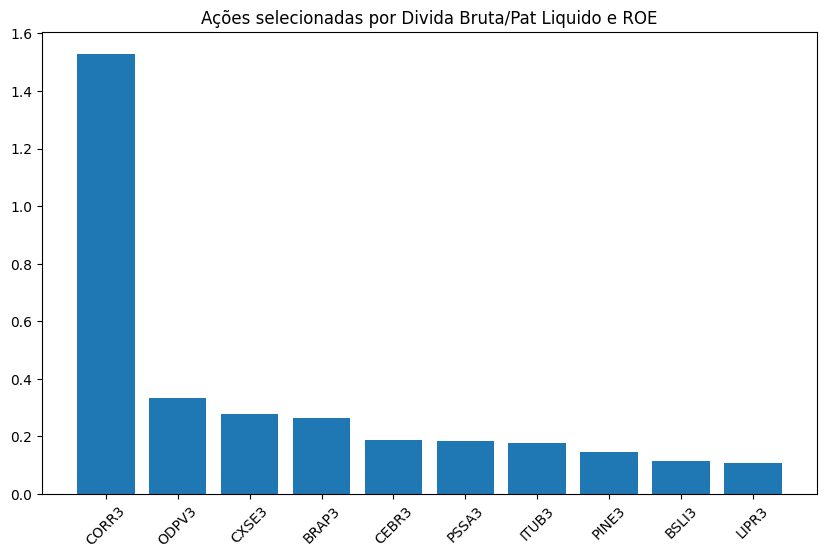

In [ ]:
plt.figure(figsize=(10,6));
plt.bar(empresas_filtradas.tail(10).index, empresas_filtradas.tail(10).roe);
plt.xticks(rotation=45);
plt.title("Ações selecionadas por Divida Bruta/Pat Liquido e ROE");

In [ ]:
ativos = [empresas_filtradas.index + '.SA']
ativos

[Index(['CORR3.SA', 'ODPV3.SA', 'CXSE3.SA', 'BRAP3.SA', 'CEBR3.SA', 'PSSA3.SA',
        'ITUB3.SA', 'PINE3.SA', 'BSLI3.SA', 'LIPR3.SA'],
       dtype='object', name='papel')]